In [1]:
import pandas as pd

# Read the CSV file
file_path1 = 'data/US_Accidents_March23.csv'
df = pd.read_csv(file_path1)

print(df.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [2]:
X = df[['Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(mi)']]
print(X.head())

   Temperature(F)  Wind_Chill(F)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9            NaN            10.0              NaN   
1            37.9            NaN            10.0              NaN   
2            36.0           33.3            10.0              3.5   
3            35.1           31.0             9.0              4.6   
4            36.0           33.3             6.0              3.5   

   Humidity(%)  Pressure(in)  Amenity   Bump  Crossing  Give_Way  ...   Stop  \
0         91.0         29.68    False  False     False     False  ...  False   
1        100.0         29.65    False  False     False     False  ...  False   
2        100.0         29.67    False  False     False     False  ...  False   
3         96.0         29.64    False  False     False     False  ...  False   
4         89.0         29.65    False  False     False     False  ...  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0            False           False  

In [3]:
num_records = df.shape[0]
print(num_records)

7728394


In [4]:
# Count occurrences of each severity level
severity_counts = df['Severity'].value_counts()

# Print the counts
print("Severity of Accidents and counts :", severity_counts)

Severity of Accidents and counts : Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64


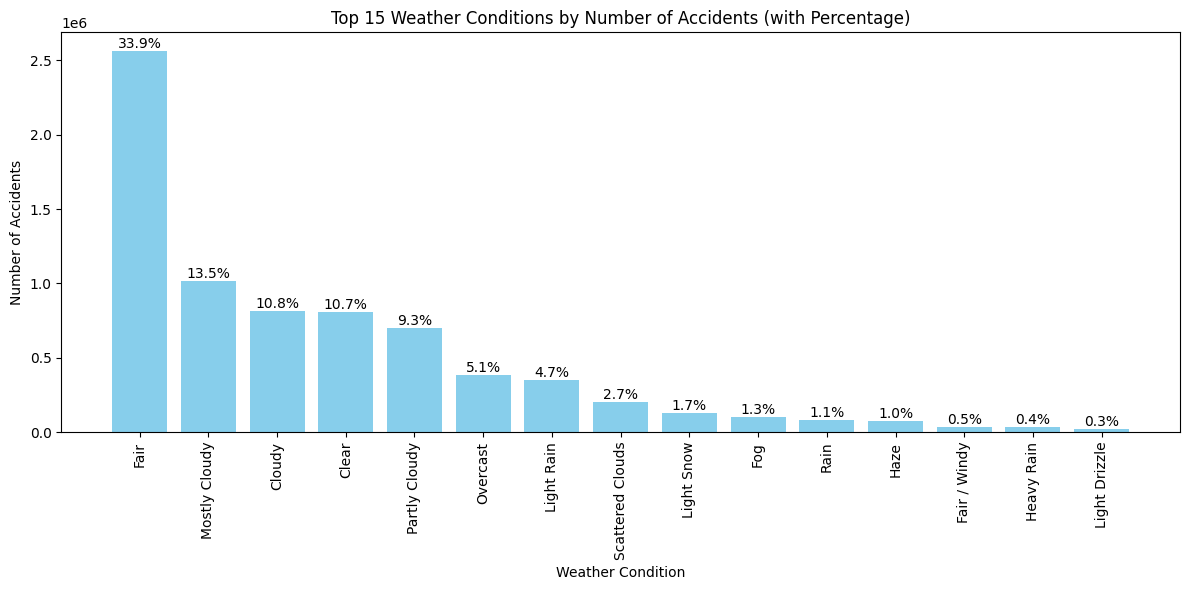

In [5]:
import matplotlib.pyplot as plt

# Group by 'Weather_Condition' and calculate the count of occurrences for each condition
weather_grouped = df.groupby('Weather_Condition').size().reset_index(name='Count')

# Calculate percentage for each weather condition
weather_grouped['Percentage'] = (weather_grouped['Count'] / weather_grouped['Count'].sum()) * 100

# Sort the DataFrame by count in descending order and take the top 15 rows
top_15 = weather_grouped.sort_values(by='Count', ascending=False).head(15)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the data
bars = plt.bar(top_15['Weather_Condition'], top_15['Count'], color='skyblue')

# Annotate bars with percentages
for bar, percentage in zip(bars, top_15['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Top 15 Weather Conditions by Number of Accidents (with Percentage)')

# Show plot
plt.tight_layout()
plt.show()


In [6]:
# Group by 'Weather_Condition' and calculate the count of occurrences for each condition
weather_grouped = df.groupby('Weather_Condition').size().reset_index(name='Count')

# Print all the rows of the grouped data
with pd.option_context('display.max_rows', None):  # Ensure all rows are displayed
    print(weather_grouped)



                       Weather_Condition    Count
0                           Blowing Dust      189
1                   Blowing Dust / Windy      266
2                           Blowing Sand        2
3                           Blowing Snow      740
4                   Blowing Snow / Windy      925
5                    Blowing Snow Nearby        1
6                                  Clear   808743
7                                 Cloudy   817082
8                         Cloudy / Windy    17035
9                          Drifting Snow        1
10                 Drifting Snow / Windy        6
11                               Drizzle     4726
12                       Drizzle / Windy       23
13                       Drizzle and Fog      393
14                           Dust Whirls        1
15                             Duststorm        3
16                                  Fair  2560802
17                          Fair / Windy    35671
18                                   Fog    99238


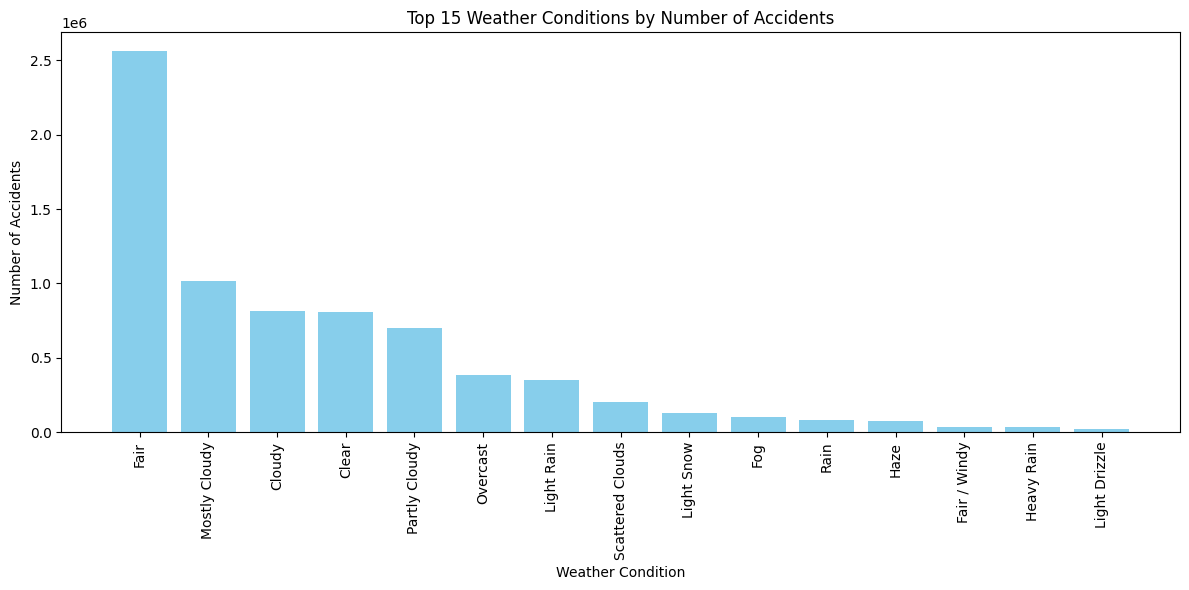

In [7]:
import matplotlib.pyplot as plt

# Sort the DataFrame by count in descending order and take the top 15 rows
top_15 = weather_grouped.sort_values(by='Count', ascending=False).head(15)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the data
plt.bar(top_15['Weather_Condition'], top_15['Count'], color='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Top 15 Weather Conditions by Number of Accidents')

# Show plot
plt.tight_layout()
plt.show()


In [8]:
# Filter the DataFrame for severity levels 3 and 4
severity_3_4_df = df[df['Severity'].isin([4])]

# Group by 'Severity' and 'Weather_Condition' and calculate the count of occurrences for each combination
severity_weather_grouped = severity_3_4_df.groupby(['Severity', 'Weather_Condition']).size().reset_index(name='Count')

# Print the grouped data
print(severity_weather_grouped)


    Severity       Weather_Condition  Count
0          4    Blowing Dust / Windy      8
1          4            Blowing Snow     39
2          4    Blowing Snow / Windy     24
3          4                   Clear  26479
4          4                  Cloudy  22828
..       ...                     ...    ...
86         4  Thunderstorms and Rain     49
87         4                 Tornado      1
88         4         Widespread Dust      3
89         4              Wintry Mix    400
90         4      Wintry Mix / Windy      7

[91 rows x 3 columns]


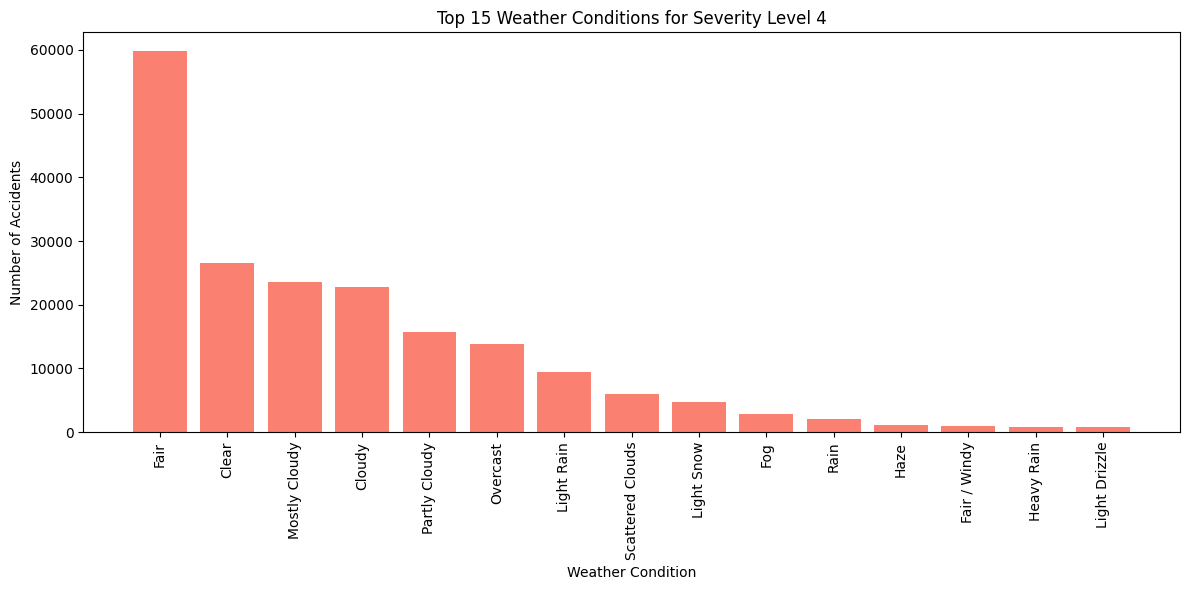

In [9]:
import matplotlib.pyplot as plt

# Sort the DataFrame by count in descending order and take the top 15 rows
top_15 = severity_weather_grouped.sort_values(by='Count', ascending=False).head(15)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the data
plt.bar(top_15['Weather_Condition'], top_15['Count'], color='salmon')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Top 15 Weather Conditions for Severity Level 4')

# Show plot
plt.tight_layout()
plt.show()


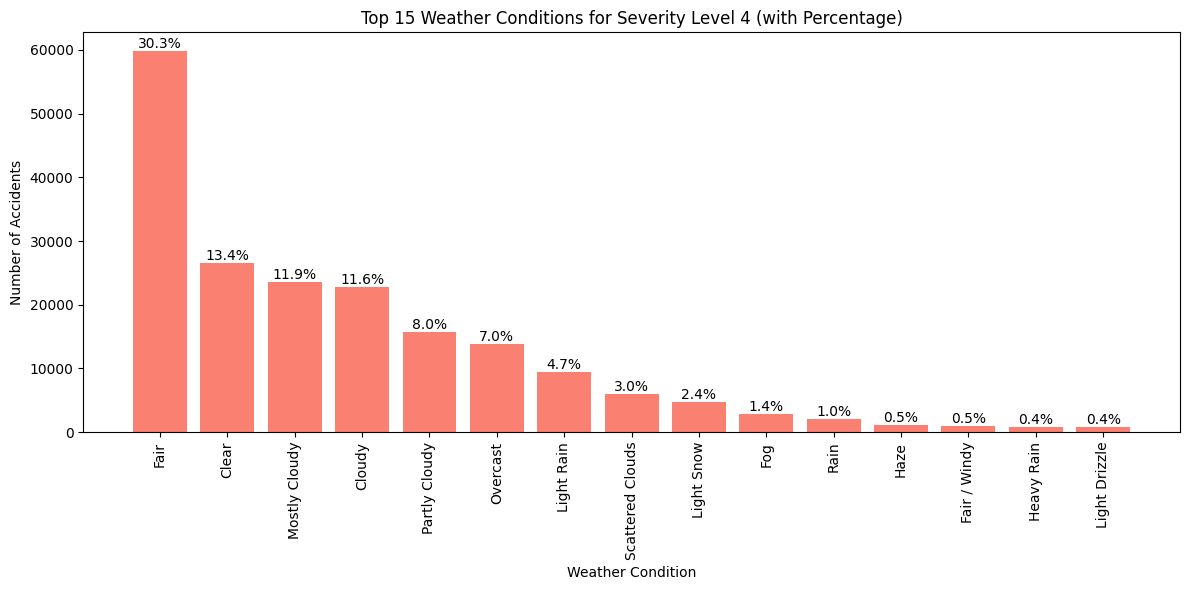

In [10]:
import matplotlib.pyplot as plt

# Filter the DataFrame for severity levels 3 and 4
severity_3_4_df = df[df['Severity'].isin([4])]

# Group by 'Severity' and 'Weather_Condition' and calculate the count of occurrences for each combination
severity_weather_grouped = severity_3_4_df.groupby(['Weather_Condition']).size().reset_index(name='Count')

# Calculate percentage for each weather condition
severity_weather_grouped['Percentage'] = (severity_weather_grouped['Count'] / severity_weather_grouped['Count'].sum()) * 100

# Sort the DataFrame by count in descending order and take the top 15 rows
top_15 = severity_weather_grouped.sort_values(by='Count', ascending=False).head(15)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the data
bars = plt.bar(top_15['Weather_Condition'], top_15['Count'], color='salmon')

# Annotate bars with percentages
for bar, percentage in zip(bars, top_15['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Top 15 Weather Conditions for Severity Level 4 (with Percentage)')

# Show plot
plt.tight_layout()
plt.show()


In [2]:
# Assuming df is your DataFrame
columns_to_drop = ['ID', 'Source', 'End_Lat', 'End_Lng', 'Description']
df.drop(columns=columns_to_drop, inplace=True)


In [3]:
# Count the number of NaN values in 'Start_Lat'
nan_count = df['Start_Lat'].isna().sum()

print("Number of records where 'Start_Lat' is NaN:", nan_count)



Number of records where 'Start_Lat' is NaN: 0


In [4]:
df.dropna(subset=['Start_Lat', 'Start_Lng'], inplace=True)


In [44]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')  # Assuming your DataFrame is loaded from a CSV file

# Filter DataFrame for severity level 4
severity_4_df = df[df['Severity'] == 4]

# Initialize Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    dcc.Graph(
        id='accident-map',
        figure={
            'data': [
                # Scattermapbox trace to plot accidents with severity level 4
                dict(
                    type='scattermapbox',
                    lat=severity_4_df['Start_Lat'],  # Latitude
                    lon=severity_4_df['Start_Lng'],  # Longitude
                    mode='markers',
                    marker=dict(size=10, color='red'),
                    text='Severity 4 Accident'
                )
            ],
            'layout': dict(
                mapbox=dict(
                    style='carto-positron',
                    center=dict(lat=df['Start_Lat'].mean(), lon=df['Start_Lng'].mean()),
                    zoom=3
                ),
                margin=dict(l=0, r=0, t=0, b=0)
            )
        }
    )
])

# Save the plot as an image file
@app.callback(
    dash.dependencies.Output('accident-map', 'figure'),
    []
)
def save_image(figure):
    pio.write_image(figure, 'accident_map.png')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [45]:
# Convert to datetime with explicit format and handle errors
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Separate date and time components
df['Start_Date'] = df['Start_Time'].dt.date
df['Start_TimeOfDay'] = df['Start_Time'].dt.time
df['End_Date'] = df['End_Time'].dt.date
df['End_TimeOfDay'] = df['End_Time'].dt.time

print(df.head())

   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059 -82.831184   
2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148 -84.032608   
3         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753 -84.205582   
4         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781 -84.188354   

   Distance(mi)                     Street          City      County State  \
0          0.01                     I-70 E        Dayton  Montgomery    OH   
1          0.01                   Brice Rd  Reynoldsburg    Franklin    OH   
2          0.01             State Route 32  Williamsburg    Clermont    OH   
3          0.01                     I-75 S        Dayton  Montgomery    OH   
4          0.01  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

      Zipcode Country    Timezone Airport_Code    Weather_Timestamp 

In [5]:
import pandas as pd

# Load your dataframe df

# Convert to datetime with explicit format and handle errors
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Round up hour if minutes > 30
df['Start_Time'] = df['Start_Time'].apply(lambda x: x.replace(minute=0, second=0) if x.minute < 30 else x.replace(hour=x.hour+1, minute=0, second=0) if x.hour < 23 else x.replace(hour=0, minute=0, second=0))
df['End_Time'] = df['End_Time'].apply(lambda x: x.replace(minute=0, second=0) if x.minute < 30 else x.replace(hour=x.hour+1, minute=0, second=0) if x.hour < 23 else x.replace(hour=0, minute=0, second=0))

# Extract only hour component
df['Start_Hour'] = df['Start_Time'].dt.strftime('%H')
df['End_Hour'] = df['End_Time'].dt.strftime('%H')

# Separate date component (optional)
df['Start_Date'] = df['Start_Time'].dt.date
df['End_Date'] = df['End_Time'].dt.date

print(df.head())



   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 06:00:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:00:00 2016-02-08 07:00:00  39.928059 -82.831184   
2         2 2016-02-08 07:00:00 2016-02-08 07:00:00  39.063148 -84.032608   
3         3 2016-02-08 07:00:00 2016-02-08 08:00:00  39.747753 -84.205582   
4         2 2016-02-08 08:00:00 2016-02-08 08:00:00  39.627781 -84.188354   

   Distance(mi)                     Street          City      County State  \
0          0.01                     I-70 E        Dayton  Montgomery    OH   
1          0.01                   Brice Rd  Reynoldsburg    Franklin    OH   
2          0.01             State Route 32  Williamsburg    Clermont    OH   
3          0.01                     I-75 S        Dayton  Montgomery    OH   
4          0.01  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

   ... Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \


In [6]:
# Separate date and time for 'Weather_Timestamp'
df['Weather_Date'] = pd.to_datetime(df['Weather_Timestamp']).dt.date
df['Weather_TimeOfDay'] = pd.to_datetime(df['Weather_Timestamp']).dt.time


In [7]:
# Fill NaN or empty values in 'Start_Date' and 'End_Date' with 'Weather_Date'
df['Start_Date'].fillna(df['Weather_Date'], inplace=True)
df['End_Date'].fillna(df['Weather_Date'], inplace=True)

In [8]:
df.drop(['Weather_Timestamp'], axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Weather_Condition' to encode each unique category with an integer
df['Weather_Encoded'] = label_encoder.fit_transform(df['Weather_Condition'])
print(df['Weather_Encoded'])

0          62
1          62
2          88
3          85
4          85
           ..
7728389    16
7728390    16
7728391    91
7728392    16
7728393    16
Name: Weather_Encoded, Length: 7728394, dtype: int64


In [10]:
# Convert miles to kilometers (1 mile = 1.60934 kilometers)
df['Distance(km)'] = df['Distance(mi)'] * 1.60934

# If you want to keep the original 'Distance(mi)' column, comment out the next line
df.drop(['Distance(mi)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
print(df['Distance(km)'])


0          0.016093
1          0.016093
2          0.016093
3          0.016093
4          0.016093
             ...   
7728389    0.873872
7728390    0.543957
7728391    0.902840
7728392    1.242410
7728393    0.864216
Name: Distance(km), Length: 7728394, dtype: float64


In [11]:
# Convert Fahrenheit to Celsius for 'Temperature(F)' column
df['Temperature(C)'] = ((df['Temperature(F)'] - 32) * 5 / 9).round(1)

# Convert Fahrenheit to Celsius for 'Wind_Chill(F)' column
df['Wind_Chill(C)'] = ((df['Wind_Chill(F)'] - 32) * 5 / 9).round(1)

# Drop the original Fahrenheit columns if desired
df.drop(['Temperature(F)', 'Wind_Chill(F)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
print(df[['Temperature(C)', 'Wind_Chill(C)']])


         Temperature(C)  Wind_Chill(C)
0                   2.7            NaN
1                   3.3            NaN
2                   2.2            0.7
3                   1.7           -0.6
4                   2.2            0.7
...                 ...            ...
7728389            30.0           30.0
7728390            21.1           21.1
7728391            22.8           22.8
7728392            21.7           21.7
7728393            26.1           26.1

[7728394 rows x 2 columns]


In [12]:
# Convert miles to kilometers for 'Visibility(mi)' column and format to two digits
df['Visibility(km)'] = (df['Visibility(mi)'] * 1.60934).apply(lambda x: f'{x:.2f}')

# Convert miles per hour to kilometers per hour for 'Wind_Speed(mph)' column and format to two digits
df['Wind_Speed(kph)'] = (df['Wind_Speed(mph)'] * 1.60934).apply(lambda x: f'{x:.2f}')

# Drop the original columns if desired
df.drop(['Visibility(mi)', 'Wind_Speed(mph)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
print(df[['Humidity(%)', 'Pressure(in)', 'Visibility(km)', 'Wind_Speed(kph)']])



         Humidity(%)  Pressure(in) Visibility(km) Wind_Speed(kph)
0               91.0         29.68          16.09             nan
1              100.0         29.65          16.09             nan
2              100.0         29.67          16.09            5.63
3               96.0         29.64          14.48            7.40
4               89.0         29.65           9.66            5.63
...              ...           ...            ...             ...
7728389         40.0         28.92          16.09           20.92
7728390         73.0         29.39          16.09            9.66
7728391         64.0         29.74          16.09           16.09
7728392         81.0         29.62          16.09           12.87
7728393         47.0         28.63          11.27           11.27

[7728394 rows x 4 columns]


In [13]:
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Convert boolean columns to 1 if True, 0 if False
for col in boolean_columns:
    df[col] = df[col].apply(lambda x: 1 if x else 0)

# Print the DataFrame to verify the changes
print(df[boolean_columns])


         Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0              0     0         0         0         0        0        0   
1              0     0         0         0         0        0        0   
2              0     0         0         0         0        0        0   
3              0     0         0         0         0        0        0   
4              0     0         0         0         0        0        0   
...          ...   ...       ...       ...       ...      ...      ...   
7728389        0     0         0         0         0        0        0   
7728390        0     0         0         0         0        0        0   
7728391        0     0         0         0         1        0        0   
7728392        0     0         0         0         0        0        0   
7728393        0     0         0         0         0        0        0   

         Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
0                 0        0     0      

In [14]:
# Mapping for 'Day' and 'Night'
time_mapping = {'Day': 1, 'Night': 0}

# Apply mapping to all relevant columns
time_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in time_columns:
    df[col] = df[col].map(time_mapping)

# Print the DataFrame to verify the changes
print(df[time_columns])


         Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
0                   0.0             0.0                0.0   
1                   0.0             0.0                0.0   
2                   0.0             0.0                1.0   
3                   0.0             1.0                1.0   
4                   1.0             1.0                1.0   
...                 ...             ...                ...   
7728389             1.0             1.0                1.0   
7728390             1.0             1.0                1.0   
7728391             1.0             1.0                1.0   
7728392             1.0             1.0                1.0   
7728393             1.0             1.0                1.0   

         Astronomical_Twilight  
0                          0.0  
1                          1.0  
2                          1.0  
3                          1.0  
4                          1.0  
...                        ...  
7728389                 

In [15]:
pd.set_option('display.max_columns', None)
print(df.head(2))


   Severity          Start_Time            End_Time  Start_Lat  Start_Lng  \
0         3 2016-02-08 06:00:00 2016-02-08 11:00:00  39.865147 -84.058723   
1         2 2016-02-08 06:00:00 2016-02-08 07:00:00  39.928059 -82.831184   

     Street          City      County State     Zipcode Country    Timezone  \
0    I-70 E        Dayton  Montgomery    OH       45424      US  US/Eastern   
1  Brice Rd  Reynoldsburg    Franklin    OH  43068-3402      US  US/Eastern   

  Airport_Code  Humidity(%)  Pressure(in) Wind_Direction  Precipitation(in)  \
0         KFFO         91.0         29.68           Calm               0.02   
1         KCMH        100.0         29.65           Calm               0.00   

  Weather_Condition  Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  \
0        Light Rain        0     0         0         0         0        0   
1        Light Rain        0     0         0         0         0        0   

   Railway  Roundabout  Station  Stop  Traffic_Calming  Traf

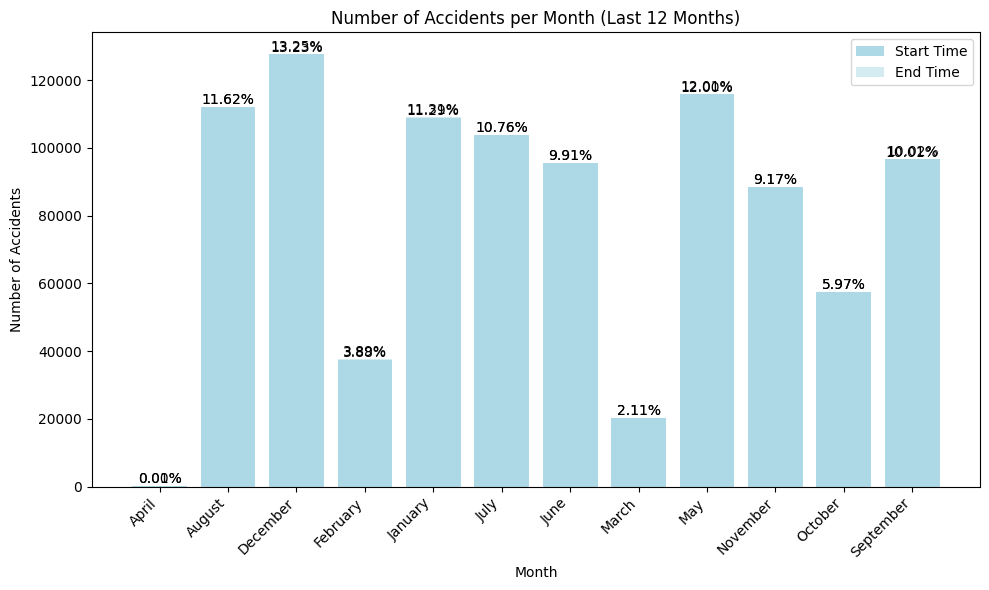

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Extract only month component
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Start_Month'] = df['Start_Time'].dt.month_name()
df['End_Month'] = df['End_Time'].dt.month_name()

# Filter data for the last 12 months
end_date = df['Start_Time'].max()
start_date = end_date - pd.DateOffset(months=11)  # 12 months ago
df_last_12_months = df[(df['Start_Time'] >= start_date) & (df['Start_Time'] <= end_date)]

# Count accidents per month
accidents_per_month_start = df_last_12_months['Start_Month'].value_counts().sort_index()
accidents_per_month_end = df_last_12_months['End_Month'].value_counts().sort_index()

# Calculate total accidents for normalization
total_accidents_start = accidents_per_month_start.sum()
total_accidents_end = accidents_per_month_end.sum()

# Plot accidents per month for the last 12 months
plt.figure(figsize=(10, 6))
bar_start = plt.bar(accidents_per_month_start.index, accidents_per_month_start.values, label='Start Time', color='#ADD8E6')  # Light blue color
bar_end = plt.bar(accidents_per_month_end.index, accidents_per_month_end.values, label='End Time', alpha=0.5, color='#ADD8E6')  # Light blue color with reduced alpha

# Annotate percentages on bars
for bar, total_accidents in zip(bar_start, accidents_per_month_start.values):
    percentage = f'{(total_accidents / total_accidents_start * 100):.2f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, percentage, ha='center', va='bottom')

for bar, total_accidents in zip(bar_end, accidents_per_month_end.values):
    percentage = f'{(total_accidents / total_accidents_end * 100):.2f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, percentage, ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month (Last 12 Months)')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend()
plt.tight_layout()
plt.show()



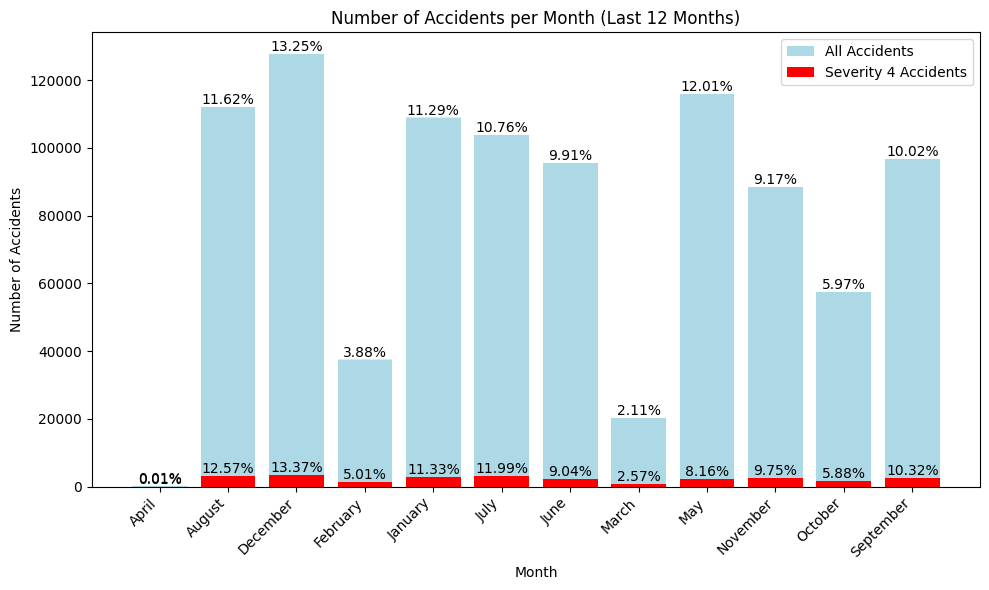

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Extract only month component
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Start_Month'] = df['Start_Time'].dt.month_name()
df['End_Month'] = df['End_Time'].dt.month_name()

# Filter data for the last 12 months
end_date = df['Start_Time'].max()
start_date = end_date - pd.DateOffset(months=11)  # 12 months ago
df_last_12_months = df[(df['Start_Time'] >= start_date) & (df['Start_Time'] <= end_date)]

# Count accidents per month for all severity levels
accidents_per_month_start = df_last_12_months['Start_Month'].value_counts().sort_index()
accidents_per_month_end = df_last_12_months['End_Month'].value_counts().sort_index()

# Filter DataFrame for severity level 4
severity_4_df = df_last_12_months[df_last_12_months['Severity'] == 4]

# Count accidents per month for severity level 4
accidents_per_month_severity_4_start = severity_4_df['Start_Month'].value_counts().sort_index()
accidents_per_month_severity_4_end = severity_4_df['End_Month'].value_counts().sort_index()

# Calculate total accidents for normalization
total_accidents_start = accidents_per_month_start.sum()
total_accidents_end = accidents_per_month_end.sum()
total_accidents_severity_4_start = accidents_per_month_severity_4_start.sum()
total_accidents_severity_4_end = accidents_per_month_severity_4_end.sum()

# Plot accidents per month for the last 12 months
plt.figure(figsize=(10, 6))
bar_start = plt.bar(accidents_per_month_start.index, accidents_per_month_start.values, label='All Accidents', color='#ADD8E6')  # Light blue color for all accidents
bar_end = plt.bar(accidents_per_month_end.index, accidents_per_month_end.values, alpha=0.5, color='#ADD8E6')  # Light blue color with reduced alpha for all accidents
bar_start_severity_4 = plt.bar(accidents_per_month_severity_4_start.index, accidents_per_month_severity_4_start.values, label='Severity 4 Accidents', color='red')  # Red color for severity level 4 accidents
bar_end_severity_4 = plt.bar(accidents_per_month_severity_4_end.index, accidents_per_month_severity_4_end.values, alpha=0.5, color='red')  # Red color with reduced alpha for severity level 4 accidents

# Annotate percentages on bars for all accidents
for bar, total_accidents in zip(bar_start, accidents_per_month_start.values):
    percentage = f'{(total_accidents / total_accidents_start * 100):.2f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, percentage, ha='center', va='bottom')

# Annotate percentages on bars for severity level 4 accidents
for bar, total_accidents in zip(bar_start_severity_4, accidents_per_month_severity_4_start.values):
    percentage = f'{(total_accidents / total_accidents_severity_4_start * 100):.2f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, percentage, ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month (Last 12 Months)')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend()
plt.tight_layout()
plt.show()



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Clean column names to remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Select relevant features (X) and target variable (y)
X = df[['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng','Weather_Encoded','Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


#import pickle

# Save the trained model to a file
#with open('random_forest_model.pkl', 'wb') as file:
#    pickle.dump(rf_classifier, file)


Accuracy: 0.8652145756007554


In [17]:
# Compute precision, recall, F1-score, and support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Compute AUC
auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_imputed), multi_class='ovr')
print("AUC:", auc)

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.21      0.33     13509
           2       0.89      0.96      0.92   1230523
           3       0.76      0.56      0.65    260525
           4       0.55      0.25      0.34     41122

    accuracy                           0.87   1545679
   macro avg       0.74      0.50      0.56   1545679
weighted avg       0.85      0.87      0.85   1545679

AUC: 0.9164990976086071


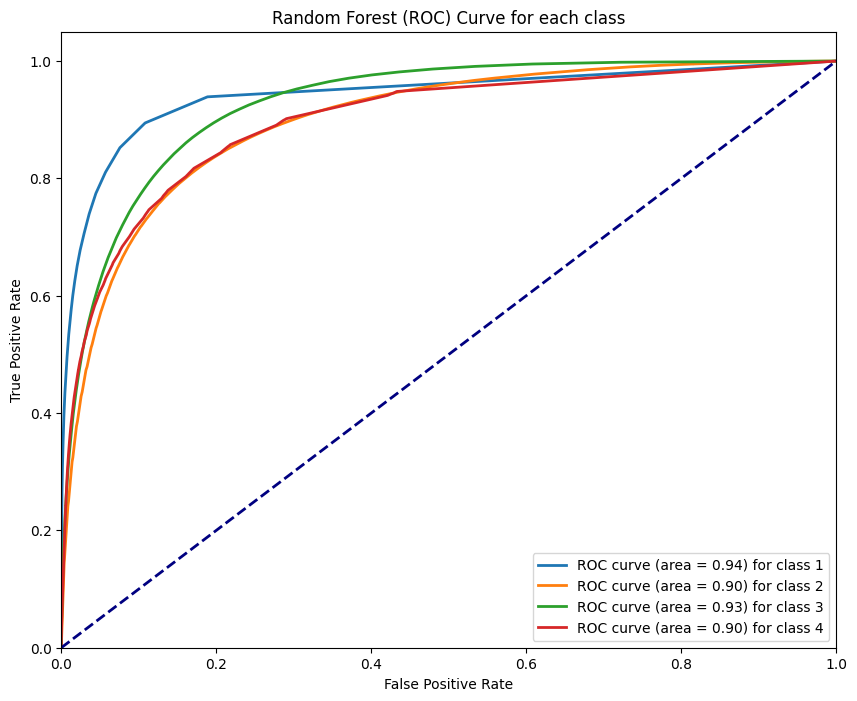

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
probs = rf_classifier.predict_proba(X_test_imputed)
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except ValueError:
        print(f"Skipping class {i} as there are no positive samples.")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    if i in roc_auc:
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i + 1))  # Adjusted index for labels
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()




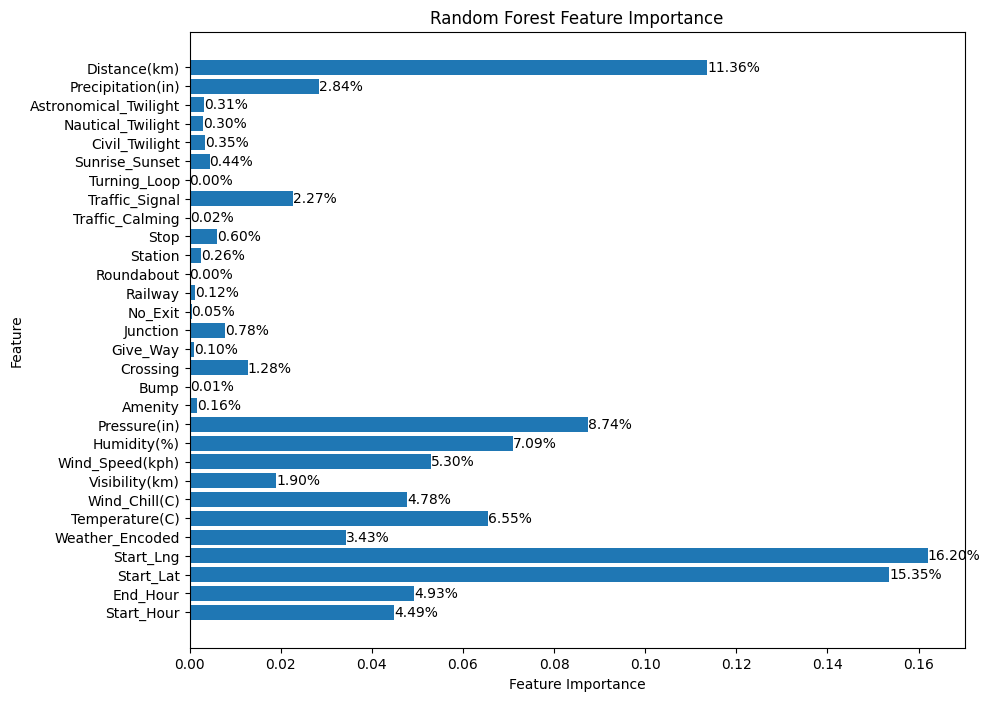

In [19]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')

# Annotate each bar with its percentage value
for i, v in enumerate(importances):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')

plt.show()


In [1]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Clean column names to remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Assuming Severity classes are [1, 2, 3, 4], map them to [0, 1, 2, 3]
#df['Severity'] = df['Severity'] - 1

# Select relevant features (X) and target variable (y)
X = df[['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng','Weather_Encoded','Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable
y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Gradient Boosting Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_imputed, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test_imputed)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

# Get feature importance
xgb_feature_importance = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})
#print("XGBoost Feature Importance:")
#print(feature_importance_df)



XGBoost Accuracy: 0.8496220754762147


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification Report
classification_rep = classification_report(y_test, xgb_pred)
print("Classification Report:\n", classification_rep)

# AUC Score
xgb_probs = xgb_classifier.predict_proba(X_test_imputed)
# For multiclass classification, you need to calculate AUC for each class.
# We'll use one-vs-rest (OvR) strategy here.
roc_auc = roc_auc_score(y_test, xgb_probs, average='macro', multi_class='ovr')
print("AUC Score:", roc_auc)





Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.05      0.09     13509
           1       0.87      0.96      0.91   1230523
           2       0.71      0.49      0.58    260525
           3       0.62      0.10      0.17     41122

    accuracy                           0.85   1545679
   macro avg       0.72      0.40      0.44   1545679
weighted avg       0.83      0.85      0.83   1545679

AUC Score: 0.909784310883487


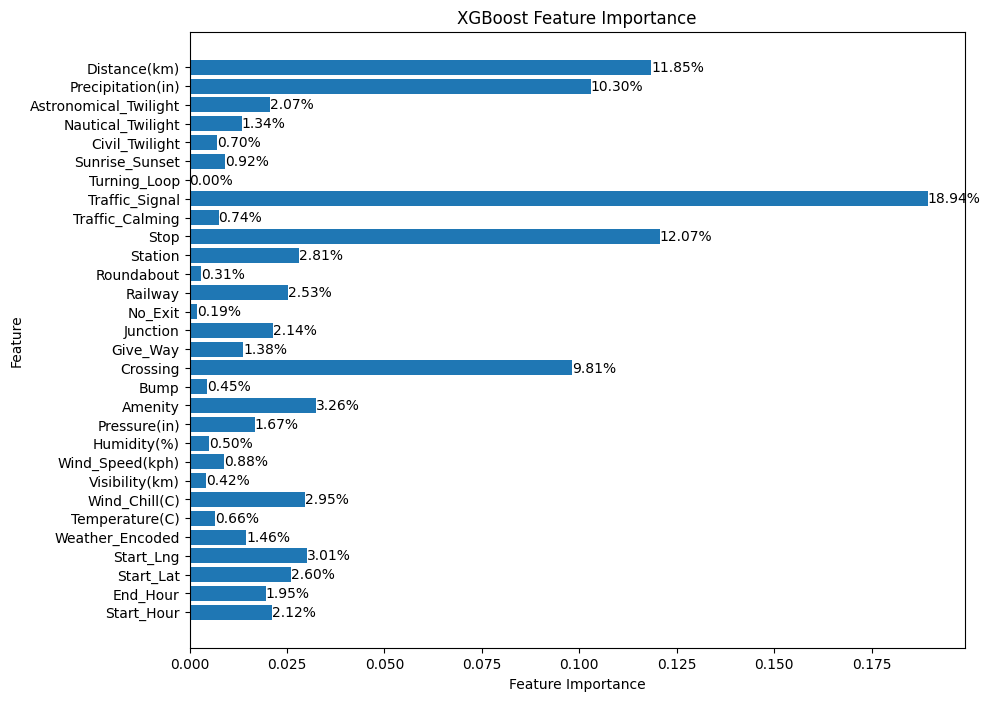

In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
importances = xgb_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
# Annotate each bar with its percentage value
for i, v in enumerate(importances):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()


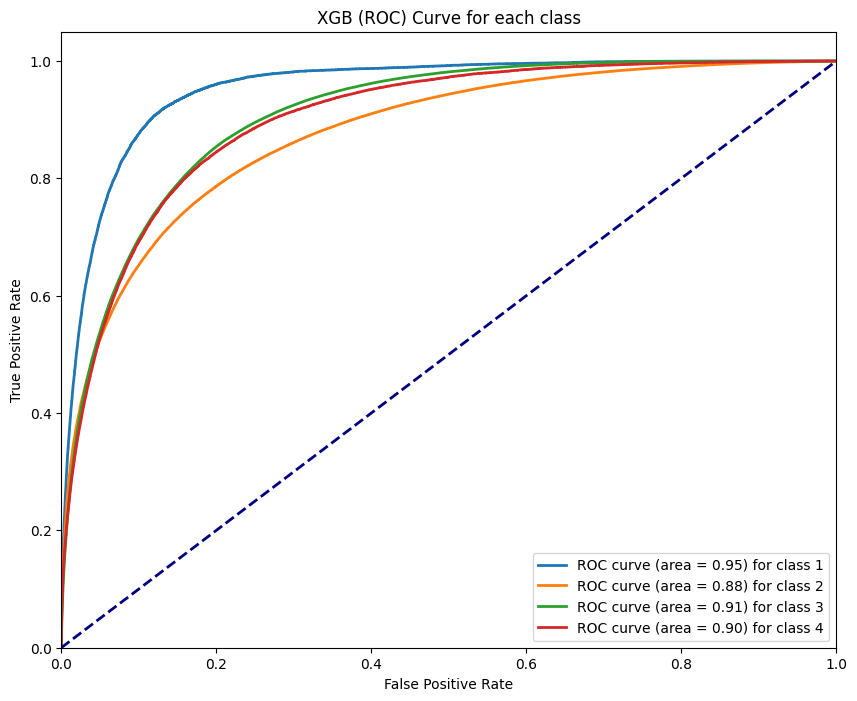

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
probs = xgb_classifier.predict_proba(X_test_imputed)
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i + 1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select relevant features (X) and target variable (y)
X = df[['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng','Weather_Encoded','Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test_imputed)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)



Decision Tree Classifier Accuracy: 0.8503499109452868


Text(0.5, 1.0, 'Decision Tree Feature Importance')

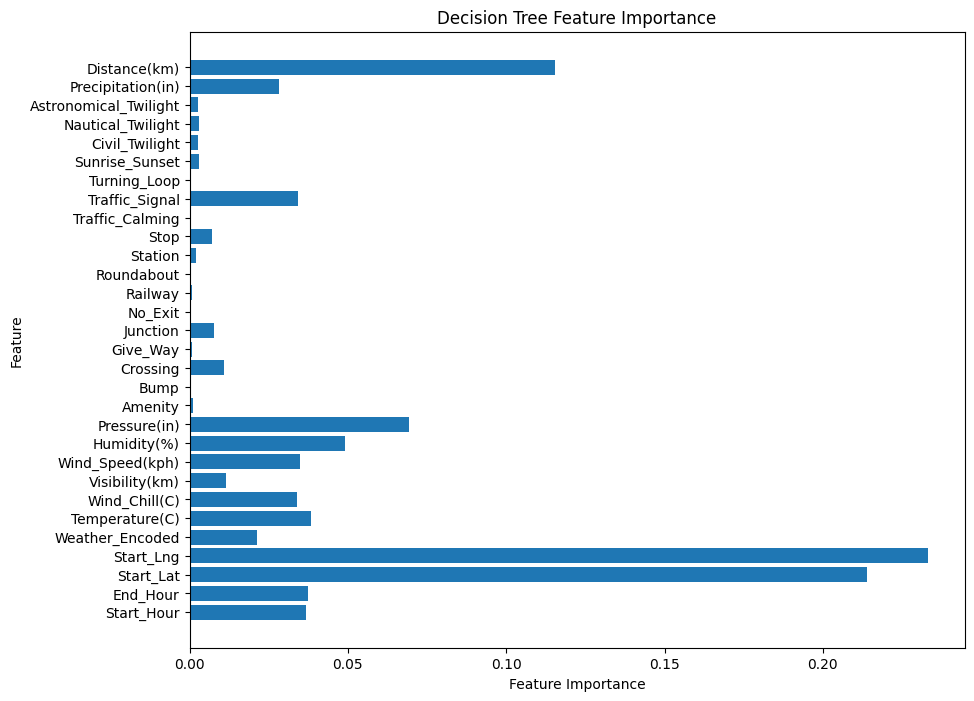

In [31]:
# Get feature importances
importances_dt = dt_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_dt)), importances_dt, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
# Annotate each bar with its percentage value


In [32]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification Report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

# Calculate AUC Score
y_probs_dt = dt_classifier.predict_proba(X_test_imputed)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt, multi_class='ovr')
print("Decision Tree AUC Score:", roc_auc_dt)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.28      0.32      0.30     13509
           2       0.91      0.91      0.91   1230523
           3       0.68      0.69      0.69    260525
           4       0.30      0.32      0.31     41122

    accuracy                           0.85   1545679
   macro avg       0.54      0.56      0.55   1545679
weighted avg       0.85      0.85      0.85   1545679

Decision Tree AUC Score: 0.7296713700162467


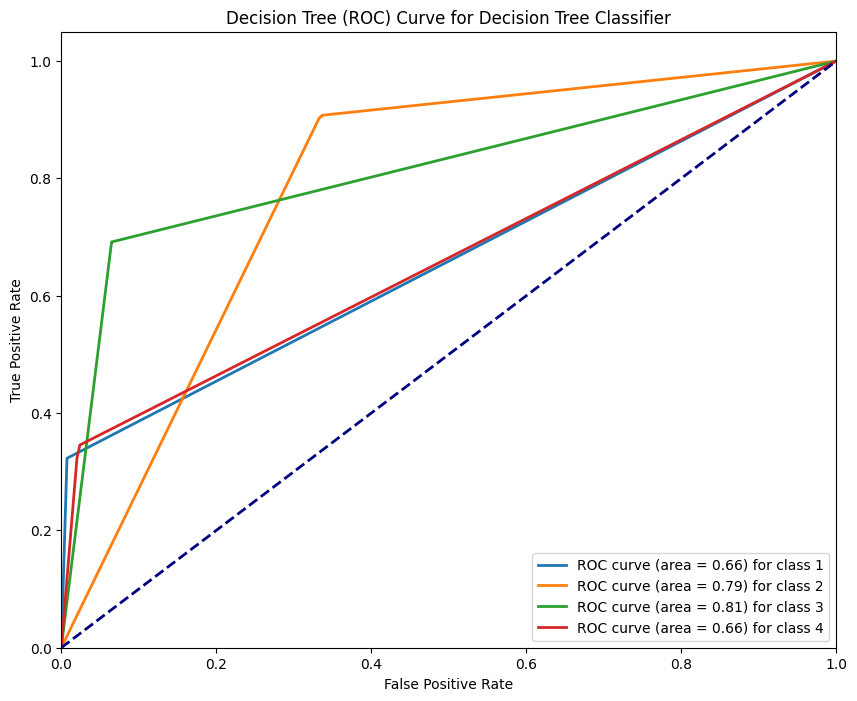

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate AUC
y_probs_dt = dt_classifier.predict_proba(X_test_imputed)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt, average='macro', multi_class='ovr')

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i + 1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (ROC) Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


In [1]:
pip install tpot


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install torch


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 23.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 151.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 97.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 26.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 36.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 46.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 26.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Assuming Severity classes are [1, 2, 3, 4], map them to [0, 1, 2, 3]
# df['Severity'] = df['Severity'] - 1

# Select relevant features (X) and target variable (y)
X = df[['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng','Weather_Encoded','Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=-1)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the testing data
tpot_accuracy = tpot.score(X_test, y_test)
print("TPOT Accuracy:", tpot_accuracy)

# Export the best pipeline as a Python script
tpot.export('tpot_best_pipeline.py')


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Select relevant features (X) and target variable (y)
X = df[['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng','Weather_Encoded','Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Multi-Layer Perceptron (MLP) classifier with specified epochs
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)  # Example: 2 hidden layers with 100 and 50 neurons, 100 epochs
mlp_classifier.fit(X_train, y_train)

# Make predictions
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


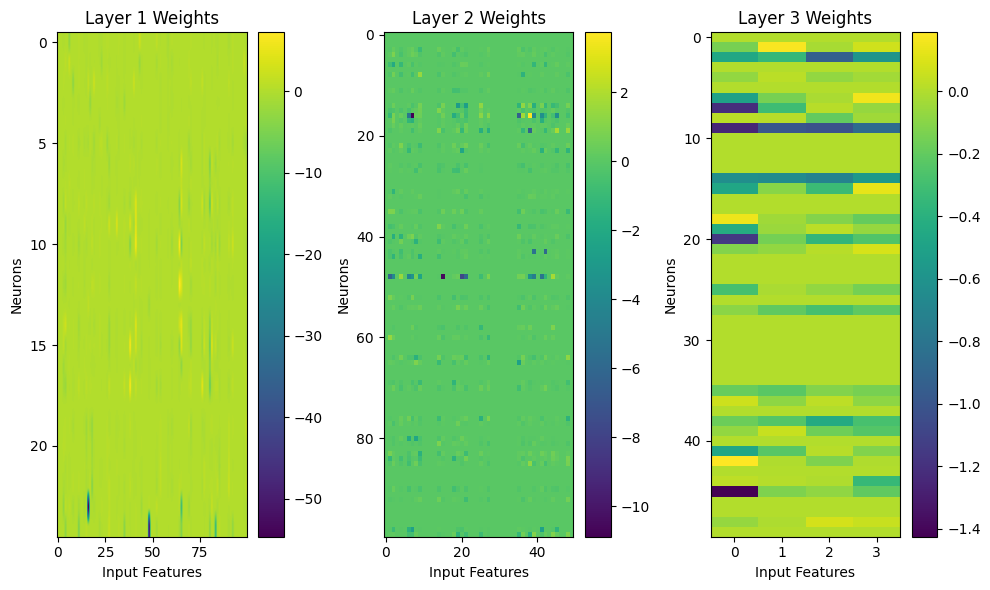

In [58]:
import matplotlib.pyplot as plt

# Extract coefficients (weights) from the trained MLP classifier
coefficients = mlp_classifier.coefs_

# Plot the weights of each feature
plt.figure(figsize=(10, 6))
for i, layer_weights in enumerate(coefficients):
    plt.subplot(1, len(coefficients), i+1)
    plt.imshow(layer_weights, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'Layer {i+1} Weights')
    plt.xlabel('Input Features')
    plt.ylabel('Neurons')
plt.tight_layout()
plt.show()


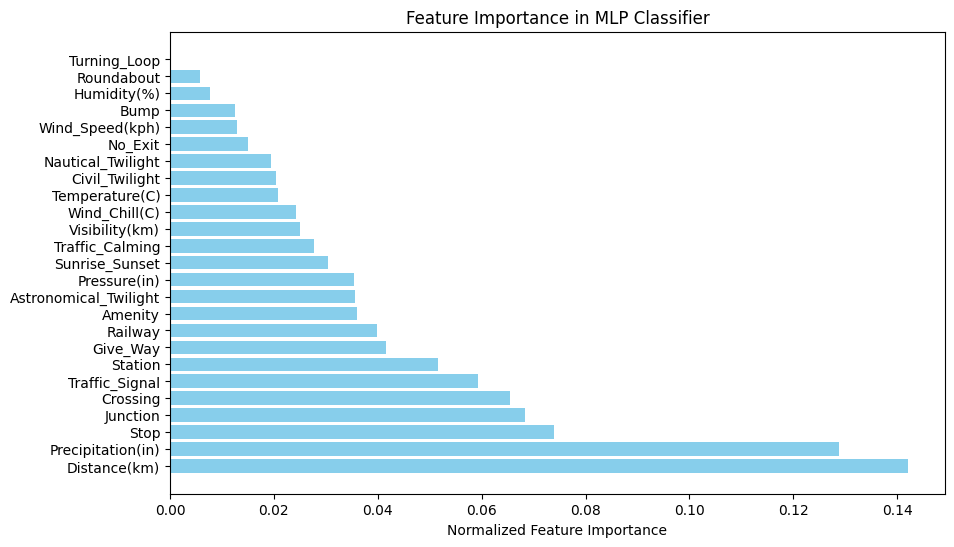

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients (weights) from the trained MLP classifier
coefficients = mlp_classifier.coefs_[0]

# Calculate feature importance by summing absolute values of coefficients
feature_importance = np.abs(coefficients).sum(axis=1)

# Normalize feature importance scores
feature_importance_normalized = feature_importance / feature_importance.sum()

# Get feature names
feature_names = X.columns

# Sort feature importance scores and feature names
sorted_indices = np.argsort(feature_importance_normalized)
sorted_feature_importance = feature_importance_normalized[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, color='skyblue')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Normalized Feature Importance')
plt.title('Feature Importance in MLP Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display features with highest importance on top
plt.show()



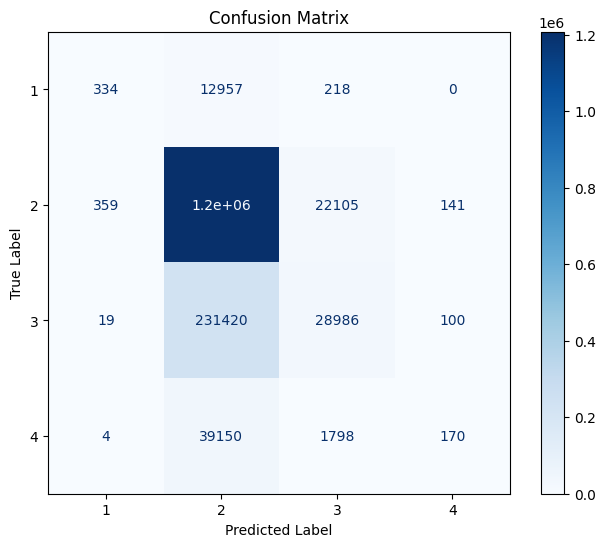

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix heatmap
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mlp_classifier.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


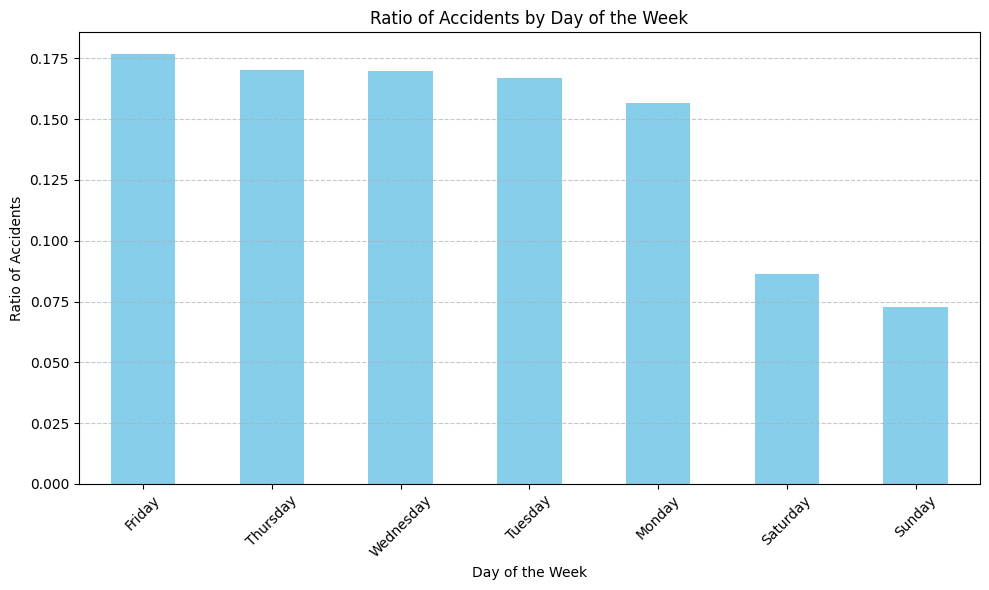

In [28]:
import matplotlib.pyplot as plt
# Extract day of the week
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Day_of_Week'] = df['Start_Date'].dt.day_name()

# Calculate the total number of accidents for each day of the week
accidents_by_day = df['Day_of_Week'].value_counts()

# Calculate the ratio of accidents for each day of the week
total_accidents = accidents_by_day.sum()
ratio_accidents = accidents_by_day / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

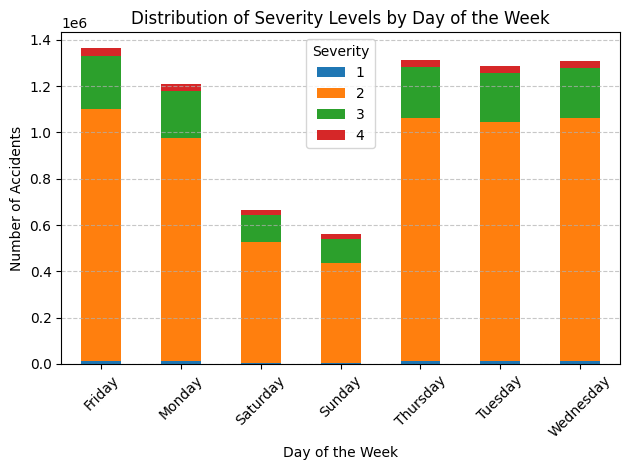

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Severity' and 'Start_Date' columns

# Convert 'Start_Date' to datetime and extract day of the week
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Day_of_Week'] = df['Start_Date'].dt.day_name()

# Calculate the total number of accidents for each day of the week and severity
accidents_by_severity_day = df.groupby(['Day_of_Week', 'Severity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
accidents_by_severity_day.plot(kind='bar', stacked=True)
plt.title('Distribution of Severity Levels by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


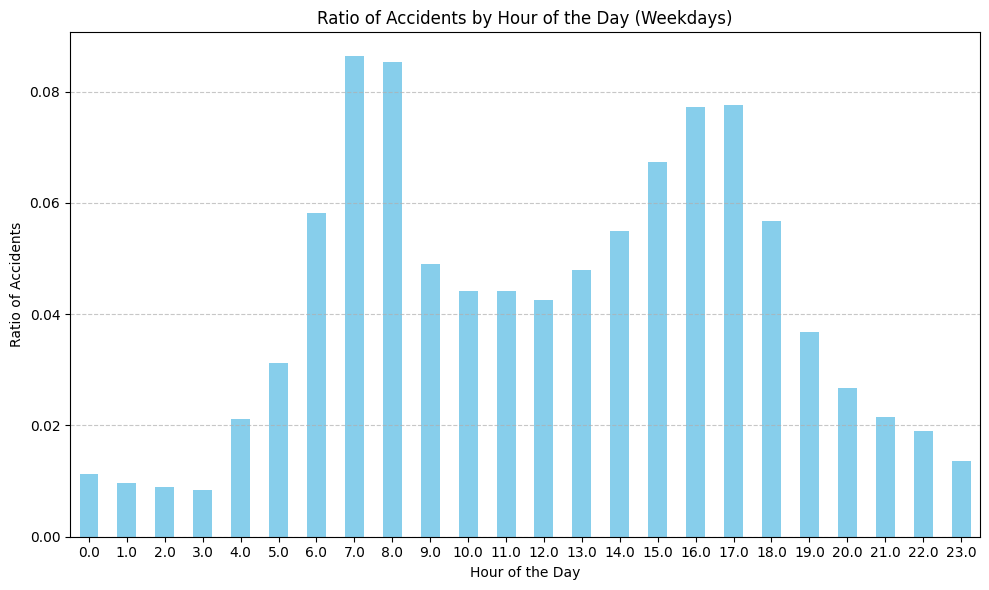

In [46]:
# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

# Calculate the total number of accidents for each hour of the day
accidents_by_hour = df_weekdays['Hour_of_Day'].value_counts().sort_index()

# Calculate the ratio of accidents for each hour of the day
total_accidents = accidents_by_hour.sum()
ratio_accidents = accidents_by_hour / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



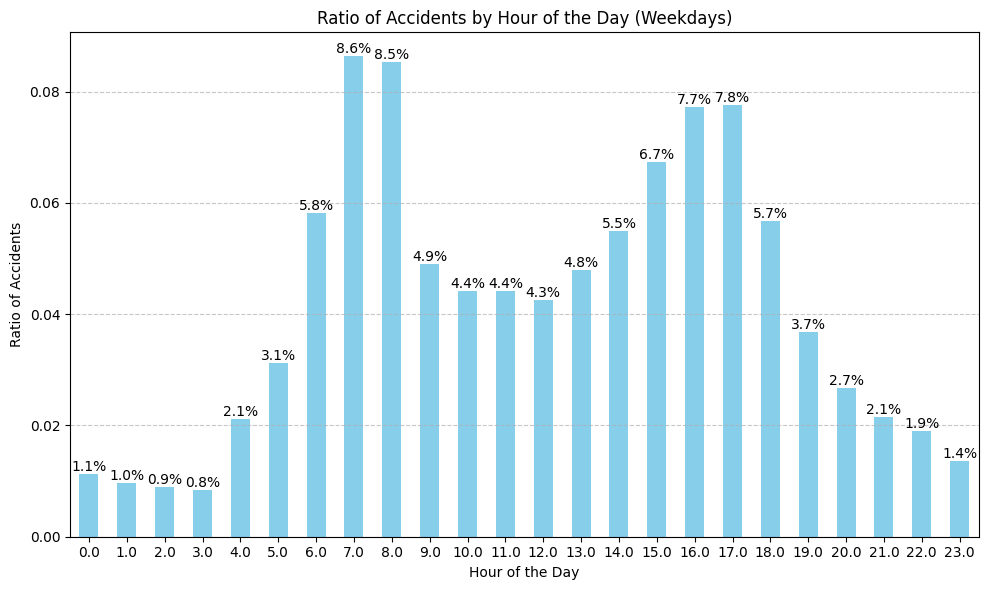

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Start_TimeOfDay' and 'Start_Date' columns

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

# Calculate the total number of accidents for each hour of the day
accidents_by_hour = df_weekdays['Hour_of_Day'].value_counts().sort_index()

# Calculate the ratio of accidents for each hour of the day
total_accidents = accidents_by_hour.sum()
ratio_accidents = accidents_by_hour / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total percentage label on top of each bar
for i, val in enumerate(ratio_accidents):
    plt.text(i, val, f"{val:.1%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

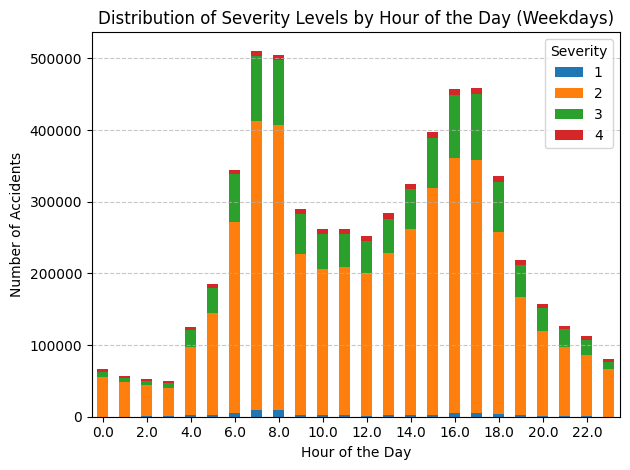

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Severity', 'Start_TimeOfDay', and 'Start_Date' columns

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

# Calculate the total number of accidents for each hour of the day and severity
accidents_by_severity_hour = df_weekdays.groupby(['Hour_of_Day', 'Severity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
accidents_by_severity_hour.plot(kind='bar', stacked=True)
plt.title('Distribution of Severity Levels by Hour of the Day (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set tick frequency to show every 2 hours
plt.gca().set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

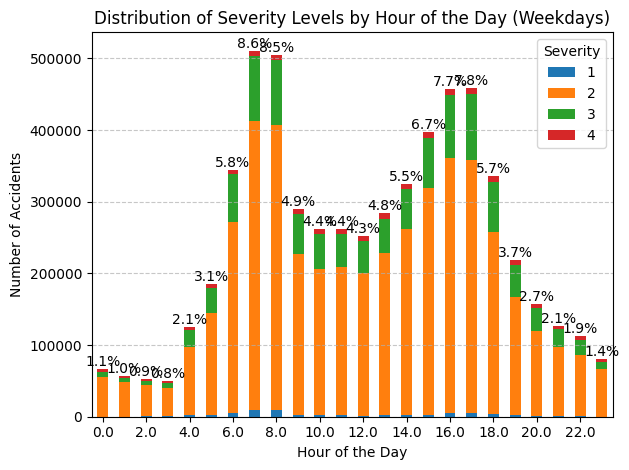

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Severity', 'Start_TimeOfDay', and 'Start_Date' columns

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

# Calculate the total number of accidents for each hour of the day and severity
accidents_by_severity_hour = df_weekdays.groupby(['Hour_of_Day', 'Severity']).size().unstack(fill_value=0)

# Calculate total percentage for each hour
total_percentages = (accidents_by_severity_hour.sum(axis=1) / accidents_by_severity_hour.sum().sum()) * 100

# Plotting
plt.figure(figsize=(15, 10))  # Larger figure size
accidents_by_severity_hour.plot(kind='bar', stacked=True)
plt.title('Distribution of Severity Levels by Hour of the Day (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Severity')

# Set tick frequency to show every 2 hours
plt.gca().set_xticks(range(0, 24, 2))

# Add total percentage labels on top of each bar
for i, val in enumerate(total_percentages):
    plt.text(i, accidents_by_severity_hour.iloc[i].sum(), f"{val:.1f}%", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




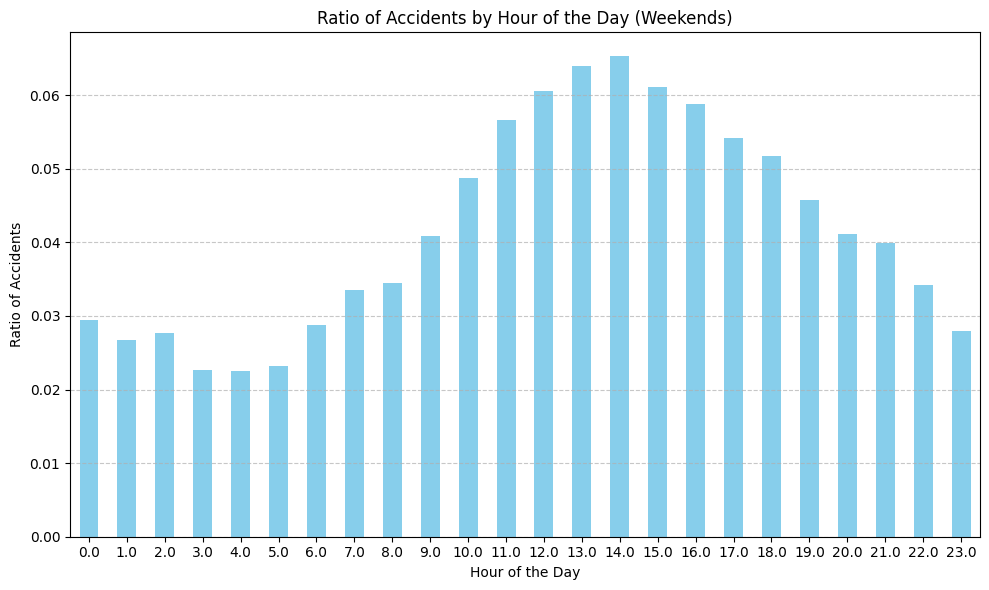

In [54]:
# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekends = ['Saturday', 'Sunday']
df_weekends = df[df['Day_of_Week'].isin(weekends)]

# Group by hour of the day and count accidents
hourly_accidents = df_weekends.groupby('Hour_of_Day').size()

# Calculate the total number of accidents on weekends
total_accidents_weekends = hourly_accidents.sum()

# Calculate the ratio of accidents for each hour of the day
ratio_accidents = hourly_accidents / total_accidents_weekends

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




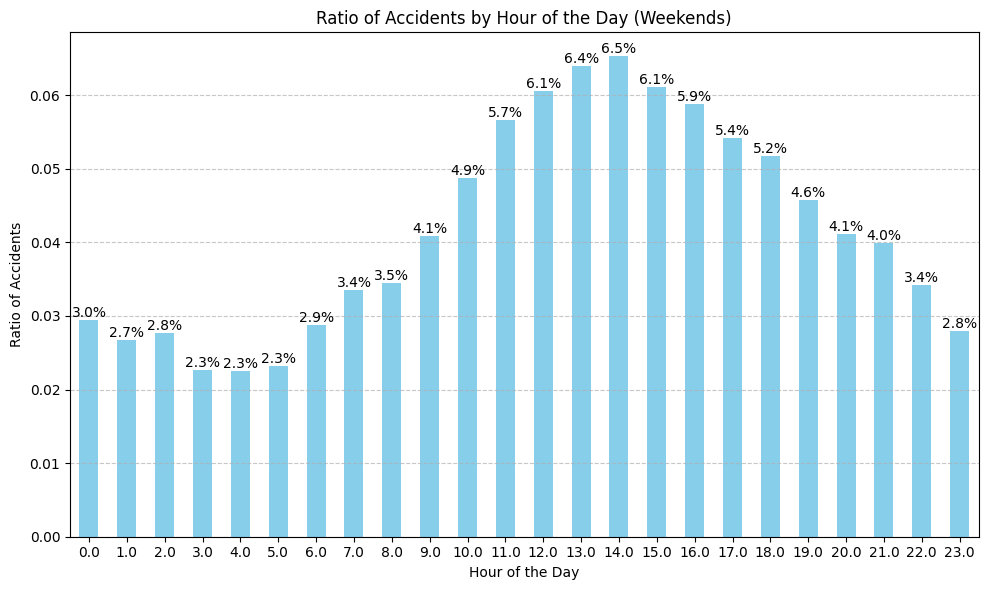

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Start_TimeOfDay' and 'Start_Date' columns

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekends = ['Saturday', 'Sunday']
df_weekends = df[df['Day_of_Week'].isin(weekends)]

# Group by hour of the day and count accidents
hourly_accidents = df_weekends.groupby('Hour_of_Day').size()

# Calculate the total number of accidents on weekends
total_accidents_weekends = hourly_accidents.sum()

# Calculate the ratio of accidents for each hour of the day
ratio_accidents = hourly_accidents / total_accidents_weekends

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total percentage labels on top of each bar
for i, val in enumerate(ratio_accidents):
    plt.text(i, val, f"{val:.1%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

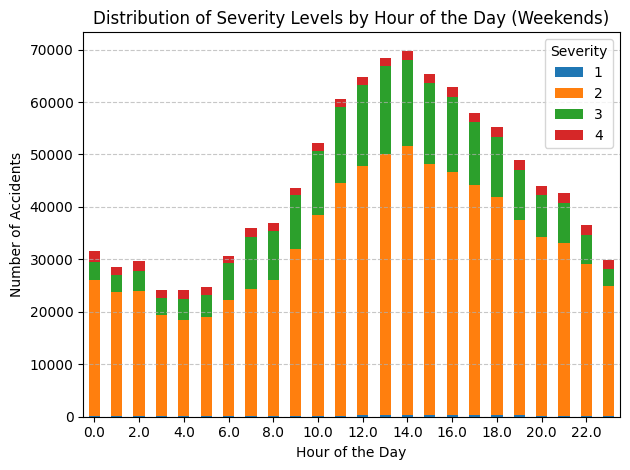

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Severity', 'Start_TimeOfDay', and 'Start_Date' columns

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekends = ['Saturday', 'Sunday']
df_weekends = df[df['Day_of_Week'].isin(weekends)]

# Group by hour of the day and severity, and count accidents
hourly_accidents_severity = df_weekends.groupby(['Hour_of_Day', 'Severity']).size().unstack(fill_value=0)

# Calculate the total number of accidents on weekends
total_accidents_weekends = hourly_accidents_severity.sum(axis=1)

# Group by hour of the day and severity and count accidents
hourly_accidents_severity = df_weekends.groupby(['Hour_of_Day', 'Severity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
hourly_accidents_severity.plot(kind='bar', stacked=True)
plt.title('Distribution of Severity Levels by Hour of the Day (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.xticks(rotation=0)
plt.legend(title='Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set tick frequency to show every 2 hours
plt.gca().set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()


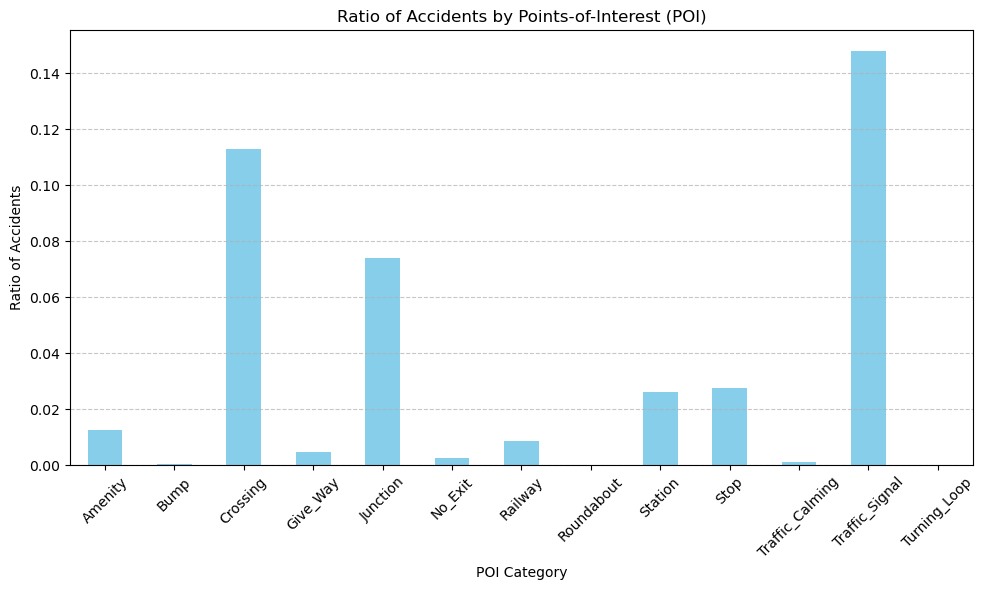

In [20]:
# Assuming your DataFrame contains boolean columns indicating points-of-interest
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Calculate total counts for each POI category
poi_counts = df[poi_columns].sum()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each POI category
poi_ratios = poi_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
poi_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Points-of-Interest (POI)')
plt.xlabel('POI Category')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


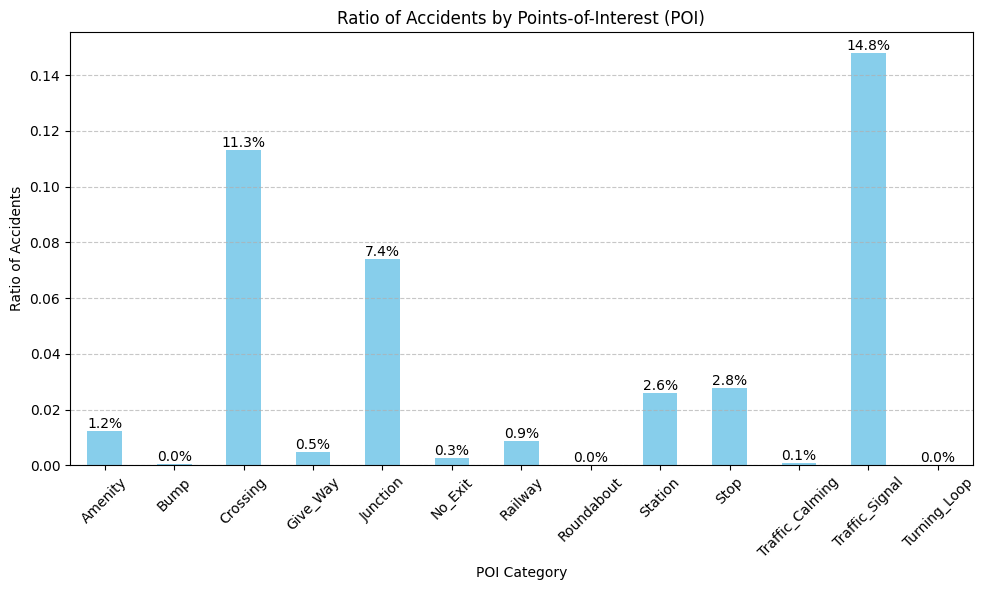

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the boolean columns indicating points-of-interest
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Calculate total counts for each POI category
poi_counts = df[poi_columns].sum()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each POI category
poi_ratios = poi_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
poi_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Points-of-Interest (POI)')
plt.xlabel('POI Category')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total percentage labels on top of each bar
for i, val in enumerate(poi_ratios):
    plt.text(i, val, f"{val:.1%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

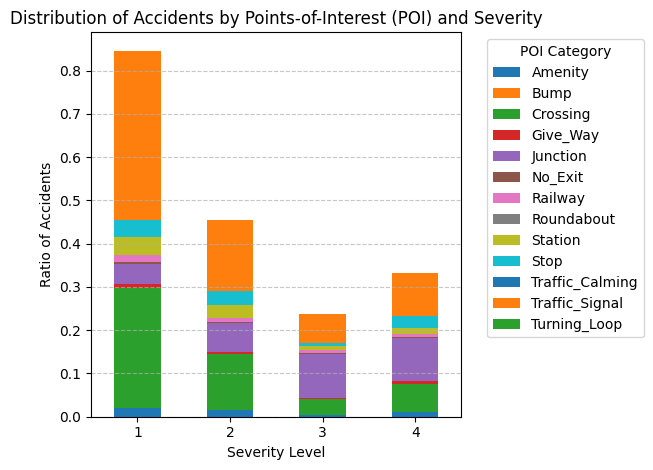

In [62]:
# Assuming your DataFrame contains boolean columns indicating points-of-interest
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Calculate total counts for each POI category and severity level
poi_severity_counts = df.groupby('Severity')[poi_columns].sum()

# Calculate the total number of accidents for each severity level
severity_total_accidents = df['Severity'].value_counts()

# Calculate the ratio of accidents for each POI category and severity level
poi_severity_ratios = poi_severity_counts.div(severity_total_accidents, axis=0)

# Plotting
plt.figure(figsize=(12, 8))
poi_severity_ratios.plot(kind='bar', stacked=True)
plt.title('Distribution of Accidents by Points-of-Interest (POI) and Severity')
plt.xlabel('Severity Level')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.legend(title='POI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


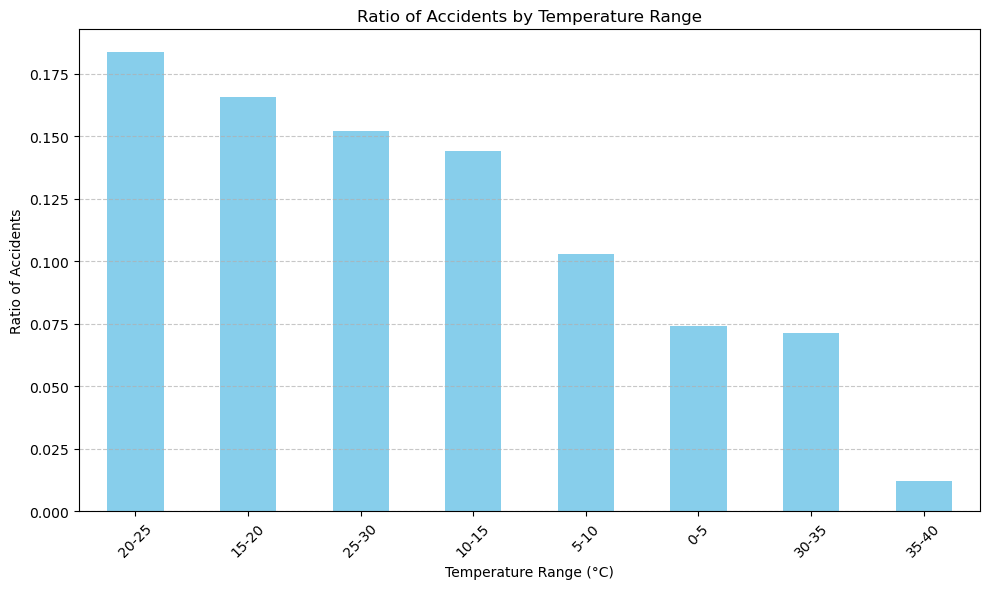

In [21]:
# Define temperature ranges and labels
temperature_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
temperature_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Cut temperature into bins
df['Temperature_Range'] = pd.cut(df['Temperature(C)'], bins=temperature_bins, labels=temperature_labels, right=False)

# Calculate total counts for each temperature range
temperature_counts = df['Temperature_Range'].value_counts()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each temperature range
temperature_ratios = temperature_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
temperature_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



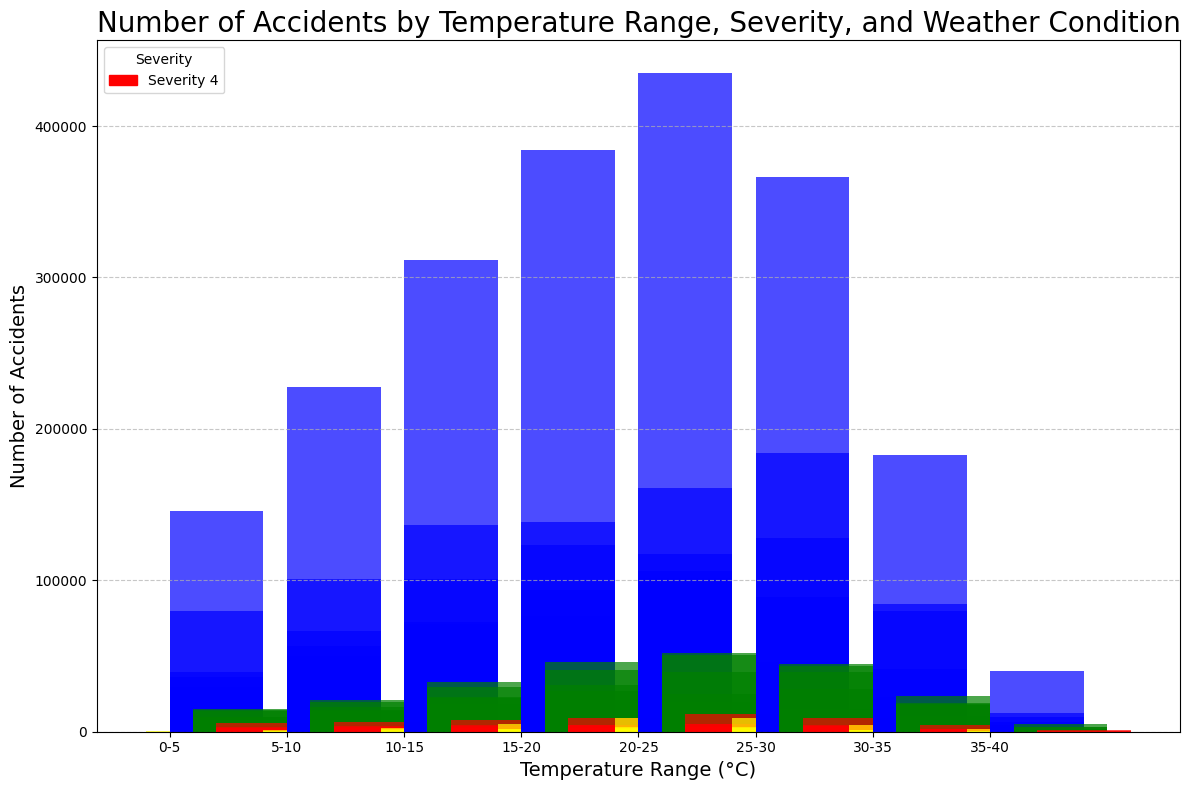

In [63]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define temperature ranges and labels
temperature_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
temperature_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Cut temperature into bins
df['Temperature_Range'] = pd.cut(df['Temperature(C)'], bins=temperature_bins, labels=temperature_labels, right=False)

# Group by temperature range, severity, and weather condition and calculate the count of occurrences for each combination
grouped_data = df.groupby(['Temperature_Range', 'Severity', 'Weather_Condition'], observed=False).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 8))

# Define colors for severity levels
severity_colors = {1: 'Yellow', 2: 'blue', 3: 'green', 4: 'red'}

# Loop through each temperature range
for idx, temp_range in enumerate(temperature_labels):
    # Filter data for the current temperature range
    temp_data = grouped_data[grouped_data['Temperature_Range'] == temp_range]
    
    # Plot grouped bar for each severity level
    for severity in temp_data['Severity'].unique():
        severity_data = temp_data[temp_data['Severity'] == severity]
        
        # Use custom color for severity level 4, default colors for other severity levels
        color = severity_colors[severity] if severity != 4 else severity_colors[4]
        
        plt.bar(
            idx + severity/5,  # Adjusting the x-coordinate for each severity level
            severity_data['Count'], 
            color=color, 
            alpha=0.7,
            label=None if severity != 4 else 'Severity 4'  # Don't label other severity levels
        )

# Add custom legend for severity level 4
plt.legend(title='Severity', handles=[plt.Rectangle((0,0),1,1, color=severity_colors[4])], labels=['Severity 4'], loc='upper left')

# Set labels and title with bigger font size
plt.title('Number of Accidents by Temperature Range, Severity, and Weather Condition', fontsize=20)
plt.xlabel('Temperature Range (°C)', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(range(len(temperature_labels)), temperature_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



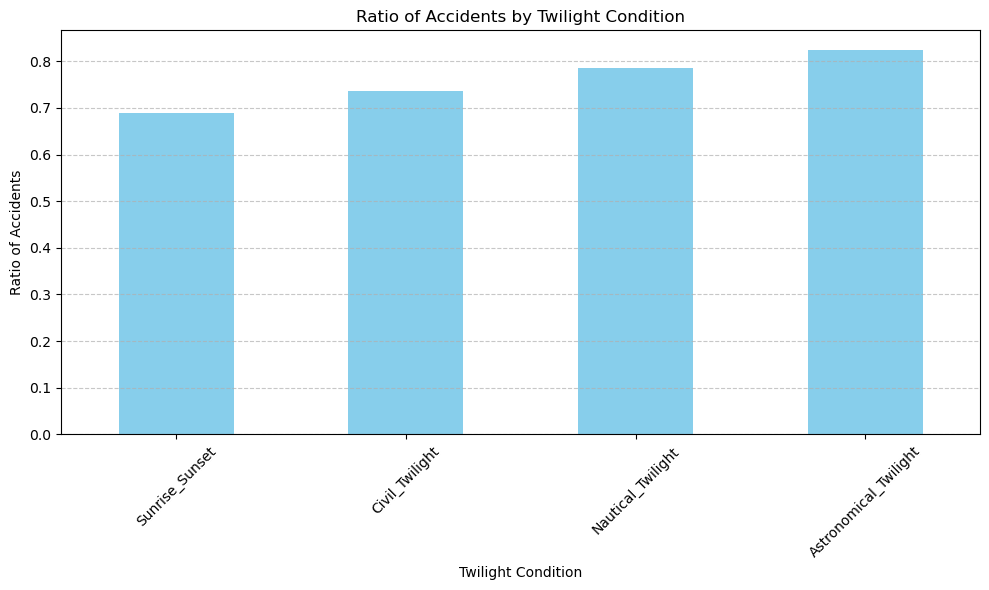

In [22]:
# Calculate total counts for each twilight condition
twilight_counts = df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].sum()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each twilight condition
twilight_ratios = twilight_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
twilight_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Twilight Condition')
plt.xlabel('Twilight Condition')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
